# Klasifikasi dengan ektraksi fitur menggunakan Latent Dirichlet Allocation (LDA)

## Load Dataset

In [1]:
import pandas as pd
data = pd.read_csv('tempo_berita.csv', on_bad_lines='skip')
data.head()

,id_berita,judul_berita,isi_berita,kategori_berita
0,2070705,Koalisi Sipil Bakal Ajukan Gugatan Uji Materi ...,KOALISI Masyarakat Sipil akan mengajukan uji m...,politik
1,2070701,Wapres Gibran Tidak Hadiri Pelantikan Menteri ...,WAKIL PresidenGibranRakabuming Raka tidak hadi...,politik
2,2070698,Prabowo Lantik Angga Raka Jadi Pengganti Hasan...,PRESIDEN Prabowo Subianto melantik Angga Raka ...,politik
3,2070693,Ini Tuntutan Asosiasi Ojek Online Saat Demo di...,ASOSIASI Pengemudi Ojek Online Garda Indonesia...,politik
4,2070689,"TNI Jaga Gedung DPR, Anggota Dewan Bilang Perl...",KOMPLEKS gedung Dewan Perwakilan Rakyat (DPR) ...,politik


In [2]:
# Perbaikan untuk menghindari SettingWithCopyWarning
data_text = data.loc[:, ['isi_berita']]
# Tetapkan DataFrame yang sudah dimodifikasi ke variabel 'documents'.
documents = data_text
# Tampilkan semua baris data
print(documents)

                                            isi_berita
0    KOALISI Masyarakat Sipil akan mengajukan uji m...
1    WAKIL PresidenGibranRakabuming Raka tidak hadi...
2    PRESIDEN Prabowo Subianto melantik Angga Raka ...
3    ASOSIASI Pengemudi Ojek Online Garda Indonesia...
4    KOMPLEKS gedung Dewan Perwakilan Rakyat (DPR) ...
..                                                 ...
695  Kejuaraan Dunia BWF 2025telah selesai digelar ...
696  LUHUT Binsar Pandjaitan kembali menjabat Ketua...
697  KEPALA Bidang Pembinaan dan Prestasi PBSIEng H...
698  TIMNAS Bola Voli Putra Iran U-21 mempertahanka...
699  CINA menjadi juara umumKejuaraan Dunia BWF 202...

[700 rows x 1 columns]


In [3]:
len(documents)

700

## Preprocessing

In [4]:
pip install gensim

In [5]:
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :

        if token not in stopwords.words('english') and len(token) > 3:

            result.append(lemmatize_stemming(token))
    return result

In [11]:
# --- Bagian 1: Memuat dan Menyiapkan Data ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer

# Unduh data NLTK
nltk.download('stopwords')
nltk.download('wordnet')

try:
    # Muat data dari file CSV
    data = pd.read_csv('tempo_berita.csv', on_bad_lines='skip')

    # KUNCI PERBAIKAN: Pastikan documents adalah list of strings
    documents = data['isi_berita'].values.tolist()

    print(f"Total {len(documents)} dokumen berhasil dimuat.")

except (FileNotFoundError, KeyError) as e:
    print(f"Error: Terjadi kesalahan saat memuat data. {e}")
    documents = []


# --- Bagian 2: Preprocessing Teks ---
if documents:
    def lemmatize_stemming(text):
        stemmer = WordNetLemmatizer()
        return stemmer.lemmatize(text, pos='v')

    stop_words = stopwords.words('indonesian')

    def tokenisasi_dan_filter(teks):
        return [
            lemmatize_stemming(kata)
            for kata in simple_preprocess(str(teks))
            if kata not in stop_words and len(kata) > 2
        ]

    data_token = [tokenisasi_dan_filter(teks) for teks in documents]

    # --- Bagian 3: Mencoba Mengakses Dokumen Tertentu ---
    # Tentukan nomor dokumen yang ingin diambil
    # Berdasarkan output, total dokumen adalah 900
    document_num = 500

    # Cek apakah nomor dokumen valid
    if 1 <= document_num <= len(documents):
        # Ambil dokumen menggunakan indeks list (document_num - 1)
        doc_sample = documents[document_num - 1]

        print("\nOriginal document:")
        words = doc_sample.split()
        print(words)

        print("\n\nTokenized and lemmatized document:")
        print(tokenisasi_dan_filter(doc_sample))
    else:
        print(f"Nomor dokumen {document_num} tidak valid. Mohon pilih nomor antara 1 dan {len(documents)}.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total 700 dokumen berhasil dimuat.

Original document:
['Direktur', 'Jenderal', 'Badan', 'Energi', 'Atom', 'Internasional', '(IAEA)', 'Rafael', 'Grossi', 'pada', 'Selasa,', '9', 'September', '2025', 'mengumumkan', 'tercapainya', 'kesepahaman', 'dengan', 'Menteri', 'Luar', 'NegeriIranAbbas', 'Araghchi', 'terkait', 'dimulainya', 'kembali', 'aktivitas', 'inspeksi', 'di', 'Iran.', '“Hari', 'ini', 'di', 'Kairo,', 'saya', 'menyepakati', 'dengan', 'Menteri', 'Luar', 'Negeri', 'Iran', 'Araghchi', 'tentang', 'langkah', 'praktis', 'untuk', 'melanjutkan', 'aktivitas', 'inspeksi', 'di', 'Iran.', 'Ini', 'adalah', 'langkah', 'penting', 'ke', 'arah', 'yang', 'benar,”', 'kata', 'Grossi', 'dalam', 'pernyataannya', 'di', 'media', 'sosial,', 'menurut', 'laporanAnadolu.', 'Grossi', 'berterima', 'kasih', 'kepada', 'Kementerian', 'Luar', 'Negeri', 'Mesir', 'dan', 'Menlu', 'Badr', 'Abdelatty', 'atas', 'peran', 'mereka.', '“Saya', 'berterima', 'kasih', 'kepada', 'Badr', 'Abdelatty', 'atas', 'komitmen', 'dan',

In [12]:
processed_docs = [preprocess(doc) for doc in data['isi_berita'].values]

In [13]:
processed_docs = data['isi_berita'].apply(preprocess)

print(processed_docs[:900])

0      [koalisi, masyarakat, sipil, akan, mengajukan,...
1      [wakil, raka, tidak, hadir, dalam, pelantikan,...
2      [presiden, prabowo, subianto, melantik, angga,...
3      [asosiasi, pengemudi, ojek, online, garda, ind...
4      [kompleks, gedung, dewan, perwakilan, rakyat, ...
                             ...                        
695    [kejuaraan, dunia, telah, selesai, digelar, ad...
696    [luhut, binsar, pandjaitan, kembali, menjabat,...
697    [kepala, bidang, pembinaan, prestasi, pbsieng,...
698    [timnas, bola, voli, putra, iran, mempertahank...
699    [cina, menjadi, juara, umumkejuaraan, dunia, d...
Name: isi_berita, Length: 700, dtype: object


## Get a BOW Dict from data

In [14]:
dictionary = gensim.corpora.Dictionary(processed_docs)

# Kode ini akan mengiterasi dan mencetak semua item dalam kamus
for k, v in dictionary.items():
    print(k, v)

0 adalah
1 ajukan
2 akan
3 amnesty
4 angkatan
5 antara
6 arsul
7 atau
8 atauuu
9 bahwa
10 baik
11 bantuan
12 banyak
13 beberapa
14 beralasan
15 berbagai
16 berbagi
17 berbeda
18 bermasalah
19 berpartisipasi
20 berpendapat
21 berujung
22 berupaya
23 contoh
24 dalam
25 dalil
26 dapat
27 darat
28 dari
29 demo
30 dengan
31 diajukan
32 diakses
33 direktur
34 disampaikan
35 diskusi
36 dissent
37 ditolak
38 diuji
39 dokumen
40 duduk
41 editor
42 eksekutif
43 elektronik
44 empat
45 enny
46 formil
47 gedung
48 guntur
49 habis
50 hakim
51 hamid
52 hamzah
53 hendak
54 hilang
55 hukum
56 imparsial
57 indonesia
58 informasi
59 international
60 isra
61 jakarta
62 juga
63 kami
64 kanal
65 kandungan
66 karena
67 kata
68 keamanan
69 kedudukan
70 kekerasan
71 kesulitan
72 ketentuan
73 koalisi
74 komisi
75 konstitusi
76 konstitusional
77 kontras
78 korban
79 laman
80 langkah
81 lembaga
82 mahkamah
83 masyarakat
84 materiil
85 materilkan
86 maupun
87 melalui
88 memberikan
89 membuka
90 membutuhkan
91 meng

## Filter the Dict

In [15]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)

## Convert document into BOW format by doc2bow

In [16]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [17]:
# Buat kamus (dictionary) untuk menyimpan total hitungan kata
total_word_counts = {}

# Iterasi melalui setiap dokumen di bow_corpus
for bow_doc in bow_corpus:
    # Iterasi melalui setiap pasangan word_id dan count dalam dokumen
    for word_id, count in bow_doc:
        # Dapatkan kata asli dari dictionary
        word = dictionary[word_id]

        # Tambahkan hitungan ke total word counts
        if word in total_word_counts:
            total_word_counts[word] += count
        else:
            total_word_counts[word] = count

# Urutkan kata-kata berdasarkan total hitungannya secara menurun
sorted_words = sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True)

# Cetak hitungan kata yang digabungkan untuk semua dokumen
print("Total hitungan kata untuk semua dokumen:")
for word, count in sorted_words:
    print(f"Kata '{word}' muncul {count} kali.")

Total hitungan kata untuk semua dokumen:
Kata 'israel' muncul 454 kali.
Kata 'bank' muncul 290 kali.
Kata 'serangan' muncul 287 kali.
Kata 'open' muncul 224 kali.
Kata 'prabowo' muncul 208 kali.
Kata 'gaza' muncul 208 kali.
Kata 'final' muncul 205 kali.
Kata 'nepal' muncul 205 kali.
Kata 'korban' muncul 194 kali.
Kata 'babak' muncul 193 kali.
Kata 'finis' muncul 184 kali.
Kata 'dana' muncul 183 kali.
Kata 'trump' muncul 177 kali.
Kata 'race' muncul 176 kali.
Kata 'kirk' muncul 168 kali.
Kata 'internasional' muncul 166 kali.
Kata 'detik' muncul 166 kali.
Kata 'tersangka' muncul 163 kali.
Kata 'palestina' muncul 159 kali.
Kata 'calon' muncul 158 kali.
Kata 'cina' muncul 155 kali.
Kata 'sesi' muncul 154 kali.
Kata 'qatar' muncul 153 kali.
Kata 'korupsi' muncul 152 kali.
Kata 'petenis' muncul 152 kali.
Kata 'anggaran' muncul 150 kali.
Kata 'militer' muncul 149 kali.
Kata 'keluarga' muncul 142 kali.
Kata 'hotel' muncul 138 kali.
Kata 'bagnaia' muncul 136 kali.
Kata 'hakim' muncul 135 kali.


## TF-IDF on our document set

In [18]:
tfidf = gensim.models.TfidfModel(bow_corpus)

In [19]:
corpus_tfidf = tfidf[bow_corpus]

In [20]:
for doc in corpus_tfidf:
    print(doc)

[(0, 0.0760077666861508), (1, 0.06258688160390163), (2, 0.09342576652783591), (3, 0.08274893538319614), (4, 0.07753119444120253), (5, 0.07457144079298197), (6, 0.07527934287252253), (7, 0.08000488144558676), (8, 0.0760077666861508), (9, 0.09342576652783591), (10, 0.07010651501128544), (11, 0.08373450727132349), (12, 0.08373450727132349), (13, 0.0919894406346671), (14, 0.08180056388971428), (15, 0.2982857631719279), (16, 0.09494919428288764), (17, 0.07321279305129277), (18, 0.08582979221517424), (19, 0.09657097387383785), (20, 0.07192385093542047), (21, 0.07915297403215274), (22, 0.08694681442219807), (23, 0.18685153305567181), (24, 0.08088668637830458), (25, 0.0582229156285363), (26, 0.07069780963335176), (27, 0.11867987567112025), (28, 0.23745892209645825), (29, 0.058589766844465666), (30, 0.08180056388971428), (31, 0.07753119444120253), (32, 0.16177337275660916), (33, 0.13682358474697826), (34, 0.09063079289297789), (35, 0.07915297403215274), (36, 0.12784294214946174), (37, 0.1379281

## Running LDA using Bag of Words data

In [21]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=900, id2word = dictionary, passes = 50, workers=2)

In [22]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 855 
Words: 0.001*"kecamatan" + 0.001*"berusaha" + 0.001*"menjalani" + 0.001*"keluarga" + 0.001*"sakit" + 0.001*"pengunjung" + 0.001*"mengambil" + 0.001*"menangani" + 0.001*"melarikan" + 0.001*"kiri"


Topic: 552 
Words: 0.116*"bebas" + 0.095*"juni" + 0.094*"latihan" + 0.078*"sesi" + 0.074*"seri" + 0.047*"italia" + 0.045*"bagnaia" + 0.044*"edisi" + 0.027*"kesembilan" + 0.023*"francesco"


Topic: 183 
Words: 0.001*"keluarga" + 0.001*"harapan" + 0.001*"penembakan" + 0.001*"sosok" + 0.001*"berharap" + 0.001*"acara" + 0.001*"tiba" + 0.001*"memberi" + 0.001*"kejadian" + 0.001*"pesan"


Topic: 854 
Words: 0.133*"minyak" + 0.080*"harga" + 0.044*"global" + 0.036*"india" + 0.036*"rata" + 0.036*"produksi" + 0.027*"penurunan" + 0.027*"naik" + 0.027*"pasar" + 0.027*"tarif"


Topic: 207 
Words: 0.001*"open" + 0.001*"tangkis" + 0.001*"ganda" + 0.001*"turnamen" + 0.001*"tunggal" + 0.001*"pbsi" + 0.001*"bulu" + 0.001*"kusuma" + 0.001*"dibagikan" + 0.001*"mengundurkan"


Topic: 714 
Words: 0.057

## Topic coherence

In [23]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4782969194627373


In [24]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -3.3350338663795203


## Find the Optimal Number of Topics

In [25]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Ubah 'passes' menjadi nilai yang lebih besar, misalnya 50
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=50, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [26]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=40, step=6)

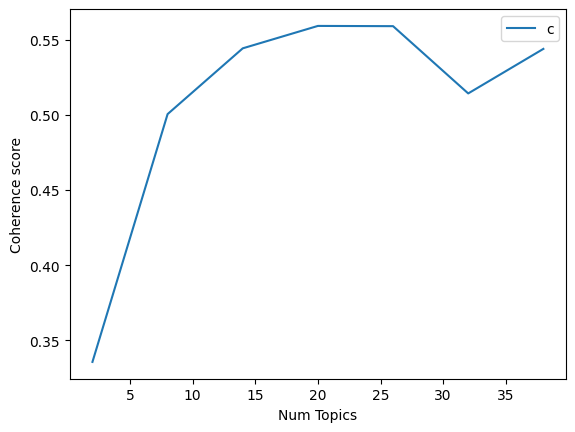

In [27]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
#seem

## Running LDA using TF-IDF

In [28]:
lda_model_tfidf = gensim.models.ldamulticore.LdaMulticore(
    corpus=corpus_tfidf,
    num_topics=100
    ,
    id2word=dictionary,
    passes=50,  # Nilai yang ditingkatkan
    workers=4
)

In [29]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.052*"final" + 0.051*"petenis" + 0.033*"open" + 0.030*"kelas" + 0.025*"semifinal" + 0.024*"mengalahkan" + 0.021*"terbaik" + 0.021*"kalah" + 0.020*"turnamen" + 0.020*"rekor"


Topic: 1 Word: 0.073*"kegiatan" + 0.056*"melibatkan" + 0.044*"dilaksanakan" + 0.042*"persiapan" + 0.038*"menggelar" + 0.027*"latihan" + 0.027*"tanggung" + 0.027*"ulang" + 0.026*"jelas" + 0.023*"koordinasi"


Topic: 2 Word: 0.109*"haji" + 0.062*"kuota" + 0.039*"lomba" + 0.035*"agama" + 0.031*"nilai" + 0.031*"ketujuh" + 0.028*"mengumpulkan" + 0.028*"menyelesaikan" + 0.027*"keuntungan" + 0.025*"pemberantasan"


Topic: 3 Word: 0.108*"digital" + 0.001*"keluar" + 0.001*"meningkatkan" + 0.001*"ekosistem" + 0.001*"super" + 0.001*"penggemar" + 0.001*"belanja" + 0.001*"membagikan" + 0.001*"membentuk" + 0.001*"grup"


Topic: 4 Word: 0.001*"alih" + 0.001*"mengambil" + 0.001*"metro" + 0.001*"polda" + 0.001*"kehilangan" + 0.001*"hilang" + 0.001*"kontras" + 0.001*"jaya" + 0.001*"terdepan" + 0.001*"quartararo"


T

## Classifying Sample Document Using LDA Bag of Words Model

In [30]:
# Asumsikan 'documents' sudah didefinisikan dari sel sebelumnya
document_num = 100

# Pastikan nomor dokumen yang dipilih valid
if 1 <= document_num <= len(documents):
    # Ambil dokumen asli (sebagai string)
    doc_sample_string = documents[document_num - 1]

    print("Original document:")
    print(doc_sample_string)

    print("\n\nTokenized and lemmatized document:")
    # Panggil fungsi preprocess dengan string asli
    print(preprocess(doc_sample_string))
else:
    print(f"Nomor dokumen {document_num} tidak valid. Mohon pilih nomor antara 1 dan {len(documents)}.")

Original document:
WAKIL Menteri Sekretaris Negara Juri Ardiantoro menegaskan bahwa pembentukantim reformasi kepolisiantidak berkaitan dengan isu pergantian Kepala Polri yang saat ini dijabat oleh Jenderal Listyo Sigit Prabowo. “Enggak(mengganti Kapolri) dong,” kata Juri di Kompleks Parlemen, Jakarta, pada Senin, 15 September 2025. Saat ini, Juri masih irit bicara mengenai formasi tim reformasi polri itu. Alasannya, dia masih menungguh arahan dari Presiden Prabowo Subianto. “Kalau presiden sudah menyampaikan kebijakan, nanti secara teknis seperti apa ya kita tunggu,” kata dia. Desakan pencopotan jabatanKapolriJenderal Listyo Sigit kembali mencuat kala gelombang demonstrasi pada akhir Agustus dan awal September lalu. Listyo mulai menjabat sebagai Kapolri di era pemerintahan periode kedua Joko Widodo pada 2021. Masyarakat mendesak Jenderal Listyo Sigit mundur dari jabatannya setelah seorang pengemudi ojol bernama Affan Kurniawan tewas dilindas kendaraan taktis Brimob. Insiden tragis ters

In [31]:
for i in range(len(bow_corpus)):
    print(f"\nDokumen ke-{i+1}:")
    for index, score in sorted(lda_model[bow_corpus[i]], key=lambda tup: tup[1], reverse=True):
        print("\tSkor: {:.4f}\t Topik: {}".format(score, lda_model.print_topic(index, 5)))


Dokumen ke-1:
	Skor: 0.5207	 Topik: 0.218*"pasal" + 0.082*"sipil" + 0.033*"perang" + 0.033*"operasi" + 0.033*"mengatur"
	Skor: 0.4679	 Topik: 0.063*"perkara" + 0.061*"mahkamah" + 0.061*"pembentukan" + 0.057*"hakim" + 0.056*"permohonan"

Dokumen ke-2:
	Skor: 0.3532	 Topik: 0.064*"istana" + 0.045*"menko" + 0.044*"kepresidenan" + 0.043*"hadir" + 0.037*"pelantikan"
	Skor: 0.2568	 Topik: 0.291*"kepresidenan" + 0.193*"staf" + 0.161*"komunikasi" + 0.130*"prabowo" + 0.083*"jabatan"
	Skor: 0.1147	 Topik: 0.111*"esdm" + 0.065*"sekretaris" + 0.053*"prabowo" + 0.046*"pembangunan" + 0.043*"staf"
	Skor: 0.0700	 Topik: 0.183*"erick" + 0.143*"thohir" + 0.076*"bumn" + 0.055*"permintaan" + 0.033*"persero"
	Skor: 0.0640	 Topik: 0.113*"reformasi" + 0.093*"polri" + 0.069*"prabowo" + 0.045*"bangsa" + 0.045*"tuntutan"
	Skor: 0.0607	 Topik: 0.091*"digital" + 0.091*"jasa" + 0.091*"barang" + 0.091*"lembaga" + 0.078*"pengadaan"
	Skor: 0.0282	 Topik: 0.528*"berikut" + 0.264*"kanal" + 0.000*"calon" + 0.000*"sekre

In [32]:
lda_model[bow_corpus[document_num]]

[(119, 0.40623474), (869, 0.5837831)]

In [33]:
sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True)

[(869, 0.5838103), (119, 0.4060422)]

In [34]:
lda_model.print_topic(index, 581)

'0.077*"putri" + 0.065*"kejuaraan" + 0.051*"final" + 0.050*"tunggal" + 0.049*"malaysia" + 0.045*"cina" + 0.044*"jepang" + 0.044*"skor" + 0.040*"korea" + 0.038*"emas" + 0.038*"pemain" + 0.036*"membawa" + 0.034*"ganda" + 0.032*"masing" + 0.031*"thailand" + 0.031*"peringkat" + 0.025*"pulang" + 0.021*"kelima" + 0.020*"kusuma" + 0.019*"dikalahkan" + 0.017*"tersingkir" + 0.017*"prancis" + 0.014*"bertanding" + 0.014*"berikutnya" + 0.013*"semifinal" + 0.013*"edisi" + 0.013*"paris" + 0.011*"india" + 0.011*"diraih" + 0.010*"chen" + 0.010*"harapan" + 0.010*"satunya" + 0.010*"unggulan" + 0.007*"menduduki" + 0.006*"kanada" + 0.005*"super" + 0.005*"unggul" + 0.003*"membuatnya" + 0.003*"mengapa" + 0.003*"menyusul" + 0.003*"kesembilan" + 0.003*"bandung" + 0.000*"perjalanan" + 0.000*"pemandangan" + 0.000*"seni" + 0.000*"eropa" + 0.000*"tiket" + 0.000*"melihat" + 0.000*"wisatawan" + 0.000*"menawarkan" + 0.000*"sejarah" + 0.000*"karya" + 0.000*"ducati" + 0.000*"mata" + 0.000*"memberi" + 0.000*"sempurna" 

## Classifying Sample Document Using LDA TF-IDF Model

In [35]:
# Cek hasil dari model
result = lda_model_tfidf[bow_corpus[document_num]]
print(f"Hasil dari model: {result}")

# Jika hasilnya tidak kosong, jalankan perulangan
if result:
    for index, score in sorted(result, key=lambda tup: tup[1], reverse=True):
        print(f"Skor: {score}\tTopik: {lda_model_tfidf.print_topic(index, 5)}")

Hasil dari model: [(5, 0.010101572), (7, 0.021435622), (16, 0.03858425), (23, 0.01008713), (30, 0.01585834), (32, 0.010072269), (39, 0.020796925), (43, 0.034273244), (45, 0.021497088), (46, 0.16620182), (47, 0.035118114), (48, 0.03478319), (50, 0.069514796), (51, 0.01076969), (54, 0.017570231), (59, 0.27027172), (76, 0.13521855), (82, 0.011557133), (91, 0.018341584), (96, 0.030087627)]
Skor: 0.2702717185020447	Topik: 0.016*"korupsi" + 0.014*"hakim" + 0.014*"anggaran" + 0.013*"pasal" + 0.013*"agung"
Skor: 0.16620181500911713	Topik: 0.068*"sidang" + 0.060*"jaksa" + 0.060*"saksi" + 0.049*"majelis" + 0.040*"pidana"
Skor: 0.135218545794487	Topik: 0.061*"senilai" + 0.045*"uang" + 0.035*"proposal" + 0.018*"lepas" + 0.001*"jaksa"
Skor: 0.06951479613780975	Topik: 0.073*"harga" + 0.065*"tiket" + 0.062*"pembangunan" + 0.033*"pendidikan" + 0.032*"direktorat"
Skor: 0.03858425095677376	Topik: 0.089*"italia" + 0.062*"mugello" + 0.060*"insiden" + 0.054*"memulai" + 0.043*"pagi"
Skor: 0.0351181142032146

## Testing Model on Unseen Document

In [36]:
unseen_documents = [
    "Pemerintah berencana menaikkan harga bahan bakar minyak bulan depan untuk menekan subsidi energi.",
    "Timnas Indonesia berhasil lolos ke semifinal Piala Asia setelah mengalahkan Jepang dengan skor 2-1.",
    "Peneliti menemukan vaksin baru yang mampu meningkatkan kekebalan tubuh terhadap varian terbaru virus corona.",
    "Bank Indonesia memperkirakan inflasi tahun 2025 akan tetap terkendali meski ada tekanan dari harga pangan.",
    "Samsung memperkenalkan teknologi layar lipat generasi baru dengan daya tahan yang lebih kuat dan ringan.",
    "Kementerian Pendidikan meluncurkan program digitalisasi sekolah untuk mempercepat transformasi pendidikan nasional."
]

# Gunakan dictionary internal dari model, bukan yang mungkin berubah
dictionary = lda_model_tfidf.id2word

# Testing dokumen baru
for i, unseen_doc in enumerate(unseen_documents):
    bow_vector = dictionary.doc2bow(preprocess(unseen_doc), allow_update=False)
    print(f"\n--- Analisis Dokumen ke-{i+1} ({unseen_doc}) ---")

    if bow_vector:
        for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: tup[1], reverse=True):
            print(f"Skor: {score:.4f}\tTopik: {lda_model_tfidf.print_topic(index, 5)}")
    else:
        print("Tidak ada kata yang terdeteksi di dokumen ini.")


--- Analisis Dokumen ke-1 (Pemerintah berencana menaikkan harga bahan bakar minyak bulan depan untuk menekan subsidi energi.) ---
Skor: 0.2513	Topik: 0.145*"minyak" + 0.061*"komunikasi" + 0.051*"bahan" + 0.049*"makan" + 0.039*"gratis"
Skor: 0.1427	Topik: 0.019*"finis" + 0.011*"bull" + 0.010*"benar" + 0.010*"acara" + 0.010*"putaran"
Skor: 0.1263	Topik: 0.073*"harga" + 0.065*"tiket" + 0.062*"pembangunan" + 0.033*"pendidikan" + 0.032*"direktorat"
Skor: 0.1263	Topik: 0.091*"cedera" + 0.054*"tulis" + 0.051*"fisik" + 0.041*"bakar" + 0.034*"bumi"
Skor: 0.1261	Topik: 0.194*"yogyakarta" + 0.080*"meter" + 0.045*"kecepatan" + 0.031*"kuasa" + 0.026*"hujan"
Skor: 0.1098	Topik: 0.112*"esdm" + 0.080*"menjabat" + 0.058*"staf" + 0.036*"widodo" + 0.035*"sekretaris"

--- Analisis Dokumen ke-2 (Timnas Indonesia berhasil lolos ke semifinal Piala Asia setelah mengalahkan Jepang dengan skor 2-1.) ---
Skor: 0.4061	Topik: 0.064*"pemain" + 0.055*"babak" + 0.050*"pasangan" + 0.044*"putri" + 0.043*"kapal"
Skor: 

## Tugas LDA

In [37]:
# --- Bagian 1: Memuat dan Menyiapkan Data ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer
import io

try:
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
except Exception as e:
    print(f"Gagal mengunduh data NLTK: {e}")

try:
    data = pd.read_csv('tempo_berita.csv', on_bad_lines='skip')
    documents = data['isi_berita'].values.tolist()
    print(f"Total {len(documents)} dokumen berhasil dimuat.")

except (FileNotFoundError, KeyError) as e:
    print(f"Error: Terjadi kesalahan saat memuat data. {e}")
    documents = []

# --- Bagian 2: Preprocessing Teks ---
if documents:
    def lemmatize_stemming(text):
        stemmer = WordNetLemmatizer()
        return stemmer.lemmatize(text, pos='v')

    stop_words = stopwords.words('indonesian')

    def tokenisasi_dan_filter(teks):
        return [
            lemmatize_stemming(kata)
            for kata in simple_preprocess(str(teks))
            if kata not in stop_words and len(kata) > 2
        ]

    data_token = [tokenisasi_dan_filter(teks) for teks in documents]

    kamus = Dictionary(data_token)
    kamus.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)
    korpus = [kamus.doc2bow(teks) for teks in data_token]

    num_topik = 20
    lda_model = LdaModel(
        korpus,
        num_topics=num_topik,
        id2word=kamus,
        passes=50,
        random_state=100
    )

    # --- Bagian 3: Membuat Tabel Proporsi Kata dalam Topik ---
    all_topics = lda_model.show_topics(num_topics=num_topik, num_words=20, formatted=False)

    proporsi_kata = []
    for topic_id, word_weights in all_topics:
        for word, weight in word_weights:
            proporsi_kata.append([f"Topik {topic_id}", word, weight])

    df_proporsi_kata = pd.DataFrame(proporsi_kata, columns=['Topik', 'Kata', 'Proporsi'])
    print("\n--- Tabel 1: Proporsi Kata dalam Topik ---")
    print(df_proporsi_kata)

    # --- Bagian 4: Membuat Tabel Proporsi Topik dalam Dokumen ---
    proporsi_topik = []
    for i, doc_bow in enumerate(korpus):
        doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0.0)

        row_data = {'Dokumen ID': i}
        for topic_id, proporsi in doc_topics:
            row_data[f"Topik {topic_id}"] = proporsi

        proporsi_topik.append(row_data)

    df_proporsi_topik = pd.DataFrame(proporsi_topik).fillna(0)
    cols = ['Dokumen ID'] + [f'Topik {i}' for i in range(num_topik)]
    df_proporsi_topik = df_proporsi_topik[cols]
    print("\n--- Tabel 2: Proporsi Topik dalam Dokumen ---")
    print(df_proporsi_topik)

    # --- Bagian 5: Menyimpan dan Mengunduh File CSV Otomatis ---
    # Simpan DataFrame pertama ke file CSV yang berbeda
    csv_file1 = "proporsi_dokumen.csv"
    df_proporsi_topik.to_csv(csv_file1, index=False)

    # Simpan DataFrame kedua ke file CSV yang berbeda
    csv_file2 = "proporsi_kata.csv"
    df_proporsi_kata.to_csv(csv_file2, index=False)

    print(f"\nFile '{csv_file1}' dan '{csv_file2}' berhasil dibuat dan siap diunduh.")

    # Anda bisa menggunakan kode ini untuk mengunduh file secara terpisah
    # files.download(csv_file1)
    # files.download(csv_file2)

else:
    print("Tidak dapat melanjutkan karena data dokumen tidak tersedia.")

Total 700 dokumen berhasil dimuat.

--- Tabel 1: Proporsi Kata dalam Topik ---
        Topik       Kata  Proporsi
0     Topik 0        kpu  0.060253
1     Topik 0    dokumen  0.042723
2     Topik 0      akses  0.026920
3     Topik 0       esdm  0.024682
4     Topik 0    pekerja  0.023309
..        ...        ...       ...
395  Topik 19     dampak  0.009427
396  Topik 19     travel  0.009169
397  Topik 19  destinasi  0.008913
398  Topik 19      asing  0.008359
399  Topik 19     wisata  0.008023

[400 rows x 3 columns]

--- Tabel 2: Proporsi Topik dalam Dokumen ---
     Dokumen ID   Topik 0   Topik 1   Topik 2   Topik 3   Topik 4   Topik 5  \
0             0  0.000505  0.000505  0.000505  0.000505  0.000505  0.000505   
1             1  0.079929  0.000735  0.000735  0.000735  0.000735  0.000735   
2             2  0.000500  0.000500  0.000500  0.000500  0.000500  0.000500   
3             3  0.000515  0.000515  0.000515  0.000515  0.000515  0.000515   
4             4  0.000617  0.000617

## Klasifikasi

In [38]:
pip install gensim scikit-learn pandas

In [39]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import ast
import gensim
from gensim.utils import simple_preprocess
import numpy as np
import os
import warnings

warnings.filterwarnings("ignore")

# --- 1. Memuat dan Menyiapkan Data ---
file_path = 'tempo_berita.csv'   # pastikan file ini sudah diupload di Colab
text_column = 'isi_berita'               # kolom berisi teks/token
label_column = 'kategori_berita'                # kolom label kategori

try:
    df = pd.read_csv(file_path)
    if text_column not in df.columns or label_column not in df.columns:
        print(f"❌ Error: Kolom '{text_column}' atau '{label_column}' tidak ditemukan.")
        print(f"Kolom tersedia: {list(df.columns)}")
        raise SystemExit
    df = df[[text_column, label_column]].copy()
    print("✅ Data berhasil dimuat.")
except FileNotFoundError:
    raise SystemExit(f"❌ File '{file_path}' tidak ditemukan di direktori kerja.")

# --- 2. Normalisasi Kolom Token ---
def detect_list_format(sample):
    """Deteksi apakah kolom berisi list (misalnya ['kata']) atau teks biasa."""
    if isinstance(sample, str) and sample.strip().startswith('[') and sample.strip().endswith(']'):
        return "list"
    return "text"

if not df[text_column].dropna().empty:
    sample_data = str(df[text_column].dropna().iloc[0])
    data_format = detect_list_format(sample_data)
else:
    data_format = "unknown"

print(f"📄 Format data terdeteksi: {data_format}")

def normalize_tokens(value):
    """Pastikan setiap entri menjadi list token yang valid."""
    if isinstance(value, list):
        return [t for t in value if isinstance(t, str) and t.strip() != ""]
    if isinstance(value, str):
        value = value.strip()
        if value.startswith('[') and value.endswith(']'):
            try:
                parsed = ast.literal_eval(value)
                if isinstance(parsed, list):
                    return [t for t in parsed if isinstance(t, str) and t.strip() != ""]
            except Exception:
                pass
        # Jika string biasa, tokenize dengan gensim
        return simple_preprocess(value)
    return []

# Terapkan normalisasi
df['tokens'] = df[text_column].apply(normalize_tokens)

# Hitung jumlah dokumen kosong & tidak kosong
total_docs = len(df)
nonempty_docs = df['tokens'].apply(len).gt(0).sum()
empty_docs = total_docs - nonempty_docs
print(f"📊 Total dokumen: {total_docs}, Non-kosong: {nonempty_docs}, Kosong: {empty_docs}")

# Hapus baris kosong
df = df[df['tokens'].apply(len) > 0].reset_index(drop=True)
if df.empty:
    raise SystemExit("❌ Tidak ada dokumen berisi token setelah normalisasi. Periksa isi file CSV.")

# --- 3. Membuat Dictionary & Corpus untuk LDA ---
dictionary = gensim.corpora.Dictionary(df['tokens'])
if len(dictionary) == 0:
    raise SystemExit("❌ Dictionary kosong. Tidak ada kata yang bisa dipelajari.")
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]
print(f"📘 Jumlah term unik: {len(dictionary)} | Jumlah dokumen: {len(corpus)}")

# --- 4. Pelatihan Model LDA ---
num_topics = min(8, len(df[label_column].unique()))  # jumlah topik disesuaikan jumlah kategori
workers = max(1, min(4, os.cpu_count() or 1))

lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary,
    passes=900,
    workers=workers,
    random_state=42
)

print("✅ Model LDA berhasil dilatih.")

# --- 5. Mendapatkan vektor topik untuk setiap dokumen ---
def get_topic_vector(lda_model, bow_vector, num_topics):
    topic_weights = np.zeros(num_topics)
    topic_scores = lda_model.get_document_topics(bow_vector)
    for topic_id, score in topic_scores:
        if 0 <= topic_id < num_topics:
            topic_weights[topic_id] = score
    return topic_weights

X = np.array([get_topic_vector(lda_model, doc, num_topics) for doc in corpus])
y = df[label_column].values

# --- 6. Pelatihan & Evaluasi Logistic Regression ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- 7. Evaluasi Model ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print("\n--- 📈 Hasil Klasifikasi ---")
print(f"Akurasi Model: {accuracy:.4f}\n")
print("Laporan Klasifikasi:")
print(report)

# --- 8. Menampilkan Top Kata Tiap Topik ---
print("\n--- 🔍 Top Kata per Topik (Top 10) ---")
for t in range(num_topics):
    print(f"Topik {t}: ", [word for word, prob in lda_model.show_topic(t, topn=10)])

print("\nProses selesai.")

✅ Data berhasil dimuat.
📄 Format data terdeteksi: text
📊 Total dokumen: 700, Non-kosong: 700, Kosong: 0
📘 Jumlah term unik: 18224 | Jumlah dokumen: 700
✅ Model LDA berhasil dilatih.

--- 📈 Hasil Klasifikasi ---
Akurasi Model: 0.6429

Laporan Klasifikasi:
               precision    recall  f1-score   support

      ekonomi       0.55      0.55      0.55        20
      hiburan       0.54      0.35      0.42        20
        hukum       0.52      0.75      0.61        20
internasional       0.68      0.85      0.76        20
     olahraga       1.00      0.85      0.92        20
     otomotif       0.83      1.00      0.91        20
      politik       0.25      0.15      0.19        20

     accuracy                           0.64       140
    macro avg       0.62      0.64      0.62       140
 weighted avg       0.62      0.64      0.62       140


--- 🔍 Top Kata per Topik (Top 10) ---
Topik 0:  ['yang', 'di', 'dan', 'untuk', 'dalam', 'ini', 'itu', 'dari', 'pada', 'dengan']
Topik 1: